## 1. Global Land Temperature dataset
### 1.1 Dataset Download
The Global Land Temperature (GLT) dataset is a large collection of measurements actively maintained by Berkeley Earth.

For the purpose of this laboratory you will work on a modified, smaller but dirtier, version of the original GLT dataset, to stress the importance of data preprocessing. More specifically, this didactic version contains the formatted output files of the major cities of the globe with monthly granularity. For the sake of simplicity, the analysis will range between almost two centuries (i.e. between the years 1817 and 2012).

The dataset is composed of ∼200k rows corresponding to the measurements taken the first day of the month in a given city. Each measurement is then described by 7 values:
- Date, when the measurement was taken
- AverageTemperature
- AverageTemperatureUncertainty
- City, from which the measurement was taken
- Country
- Latitude
- Longitude

The dataset is available in CSV format. You can find it at the following URL
https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/GLT_filtered.csv


## 1.2. Exercises

**1.** Load the Global Land Temperature dataset as a list of lists. Before starting, take a moment to better inspect the attributes you are going to work on. How many of them are nominal, how many continuous or discrete?

In [107]:
import csv

In [108]:
with open('GLT.csv','r') as file:
    obj = csv.reader(file)
    columns = next(obj)
    data = [[] for i in columns]
    length = len(data)
    for x in obj:
        for y in range(length):
            if len(x) == length:
                data[y].append(x[y])

In [109]:
#in order to see the data example of 10000th index:
for c in range(len(columns)):
    print(f"{columns[c]}: {data[c][10000]}")
print("\n-City and Country is absolutely nominal\n"
"-Latitude and Longitude can be considered as nomimal too\n"
"if we do not any operation such as (<,>) (ordinal),\n"
"(+,-) (interval) or (*,/) (ratio). If we do any,we can  \n"
"class this variable based on the selection\n"
"-Date is an interval attribute\n"
"-AverageTemperature and AverageTemperatureUncertainty is continious ratio attributes")



Date: 1931-05-01
AverageTemperature: 20.849
AverageTemperatureUncertainty: 0.25
City: Alexandria
Country: Egypt
Latitude: 31.35N
Longitude: 30.16E

-City and Country is absolutely nominal
-Latitude and Longitude can be considered as nomimal too
if we do not any operation such as (<,>) (ordinal),
(+,-) (interval) or (*,/) (ratio). If we do any,we can  
class this variable based on the selection
-Date is an interval attribute
-AverageTemperature and AverageTemperatureUncertainty is continious ratio attributes


**2.** Analyze the attribute AverageTemperature, which contains missing values. Fill any gap with the arithmetic mean among the closest antecedent and the closest successive measurements in time. Assume the following rules for edge cases:

(**a**) it can happen that a missing value does not have a preceding (or successive) measurement.
This happens when the missing value is the first (or last) value of the dataset. If this is the
case, consider the missing value to be preceded (or followed) by a 0, then compute the mean
accordingly.

original_list = [ '', 5, 6, '' ]

step_1 = [ 2.5, 5, 6, '' ] # (0 + 5) / 2

step_2 = [ 2.5, 5, 6, 3 ] # (6 + 0) / 2

(**b**) if there are consecutive missing values, just compute them in temporal order and use the newly
inserted values to evaluate the following ones. Here it is an example with a simple list where
both (a) and (b) rules have been applied:

original_list = [ '', '', 24, 28.9 ]

step_1 = [ 12, '', 24, 28.9 ] # (0 + 24) / 2

step_2 = [ 12, 18, 24, 28.9 ] # (12 + 24) / 2


In [146]:
i = columns.index('AverageTemperature')
c = 0
for x in range(len(data[i])):
    if data[i][x] == '':
        c+=1
print(f"For AverageTemperature:\nNumber of objects: {len(data[i])}\nNumber of 'empty objects: {c}'")

For AverageTemperature:
Number of objects: 219575
Number of 'empty objects: 27581'


In [147]:
def missingValues(dataset,index):
    step_1 = dataset[index]
    for i in range(len(step_1)):
        if step_1[i] == '':
            try:
                step_1[i] = (float(step_1[i-1])+float(step_1[i+1]))/2
            except:
                if i==0:
                    control = i+1
                    flag = 0
                    while flag<1:
                        if step_1[control] == '':
                            control += 1
                        else:
                            step_1[i]= float(step_1[control])/2
                            flag = 1
                elif i == len(step_1)-1:
                    control = i-1
                    flag = 0
                    while flag<1:
                        if step_1[control] == '':
                            control -= 1
                        else:
                            step_1[i]=float(step_1[control])/2
                            flag = 1
                else:
                    csuc, cant = i+1, i-1
                    flag1 = 0
                    vsuc = 0
                    while flag1<1:
                        if csuc == len(step_1)-1 and step_1[csuc]=='':
                            flag1=1
                        elif step_1[csuc]=='':
                            csuc +=1
                        else:
                            vsuc = step_1[csuc]
                            flag1=1
                    step_1[i] = (float(vsuc)+float(step_1[i-1]))/2
    dataset[index]= step_1
    return dataset

In [148]:
fillData = missingValues(data,columns.index('AverageTemperature'))

**3.** Define a function that, given the name of a city and an integer N > 0, prints:

(a) the top N hottest measurements;

(b) the top N coldest measurements.

In [170]:
def hotColdN(fillData, city, N):
    index = [round(float(data[1][y]),2) for y in [x for x in range(len(data[3])) if data[3][x]==city]]
    ordered = sorted(index)
    print(city)
    print("Hottest measurements:", ordered[-N:])
    print("Coldest measurements:", ordered[:N])
    return ordered

In [171]:
rome = hotColdN(data,'Rome',5)
bangkok = hotColdN(data,'Bangkok',5)

Rome
Hottest measurements: [24.48, 24.73, 24.87, 25.0, 25.95]
Coldest measurements: [-1.44, -1.3, -1.02, -0.87, -0.78]
Bangkok
Hottest measurements: [87.71, 87.77, 87.84, 87.95, 88.01]
Coldest measurements: [71.41, 71.47, 72.06, 72.15, 72.49]


**4.**(*) Let’s search for other anomalies in data distribution with the help of matplotlib. Plot the distribution of the average land temperatures for Rome and Bangkok using the aforementioned histogram plotting function.

Info: calling the plt.hist() method twice will draw the second histogram onto the canvas
generated by the first call.

As you can see, Rome and Bangkok have very different temperature distributions, but this seems plausible. What it looks strange is the large difference in their temperatures’ magnitude. Is it possible that all sensors from Bangkok stations, along the entire time-span, were faulty? Could they were configured to use another representation of the temperature measurement? Can you figure out a data cleaning step to solve it?


In [191]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([  4.,   9.,  21.,  28.,  73.,  83., 124., 198., 110., 149., 196.,
        219., 316., 280., 208., 149.,  82.,  59.,  28.,  16.]),
 array([71.41, 72.24, 73.07, 73.9 , 74.73, 75.56, 76.39, 77.22, 78.05,
        78.88, 79.71, 80.54, 81.37, 82.2 , 83.03, 83.86, 84.69, 85.52,
        86.35, 87.18, 88.01]),
 <BarContainer object of 20 artists>)

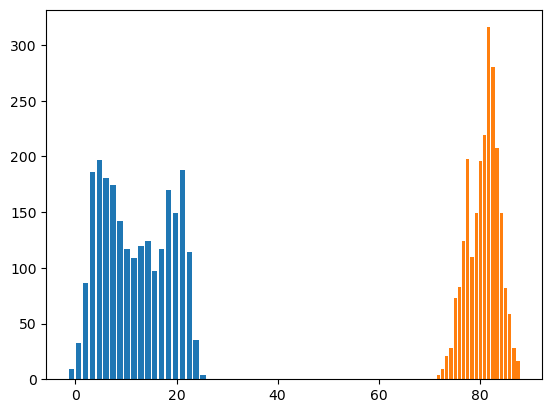

In [192]:
plt.hist(rome,bins=20,rwidth=0.8)
plt.hist(bangkok,bins=20,rwidth=0.8)

In [193]:
#Although Rome seems plausible, Bangkok's min and max values are also irrational
#There is no possibility of being faulty of all sensors during entire time-span in Bangkok
#This values might be represented as another temperature measurement than Celsius
#In order to solve this, a map function might be used to all measurements of Bangkok

**5.** (*) One might think that Bangkok sensor provide temperature samples in degrees Fahrenheit while the ones located in Rome use the Celsius notation, which is the common representation in the whole dataset. Write a function to transform Fahrenheit measurements back to Celsius, apply it to your data and plot the two distribution again.

Info: remember that the mapping function from Celsius to Fahrenheit is the following

TF = 1.8 · TC + 32


In [195]:
bangkokC = list(map(lambda x: (x-32)/1.8,bangkok))

Text(0.5, 1.0, 'Rome and Bangkok Measurements')

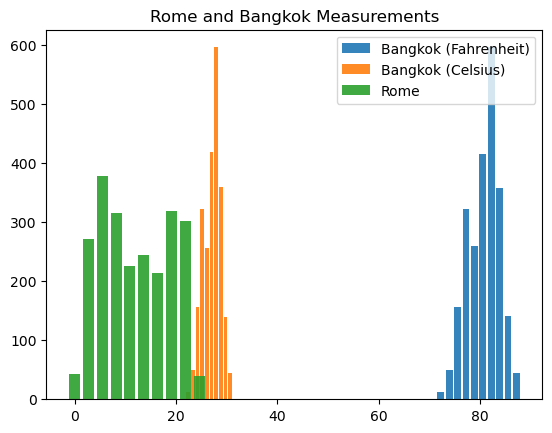

In [199]:
plt.clf()
plt.hist(bangkok,rwidth=0.8,label="Bangkok (Fahrenheit)",alpha=0.9)
plt.hist(bangkokC,rwidth=0.8,label="Bangkok (Celsius)", alpha=0.9)
plt.hist(rome,rwidth=0.8,label='Rome',alpha=0.9)
plt.legend()
plt.title('Rome and Bangkok Measurements')